# **A* Algorithm for Shortest Path: A Practical Guide**

**The A* algorithm is a powerful pathfinding algorithm that uses a heuristic function to estimate the cost of reaching the goal from a given node. This allows the algorithm to prune the search space and find the shortest path more efficiently than other algorithms, such as Dijkstra's algorithm.**

## **Heuristic function**

The heuristic function can be anything that provides an estimate of the distance to the goal, such as the Euclidean distance, the Manhattan distance, or the distance along a road network. The choice of heuristic function can have a significant impact on the performance of the algorithm.

## **Uses of the A* algorithm**

**The A* algorithm is used in a wide variety of applications, including:**

* **Robotics:** To navigate robots through complex environments.
* **Video games:** To create realistic pathfinding for NPCs and enemies.
* **Logistics:** To route vehicles through a network of roads or warehouses.
* **Kaggle competitions:** To find the shortest path between two points on a map or to route vehicles through a network of roads.

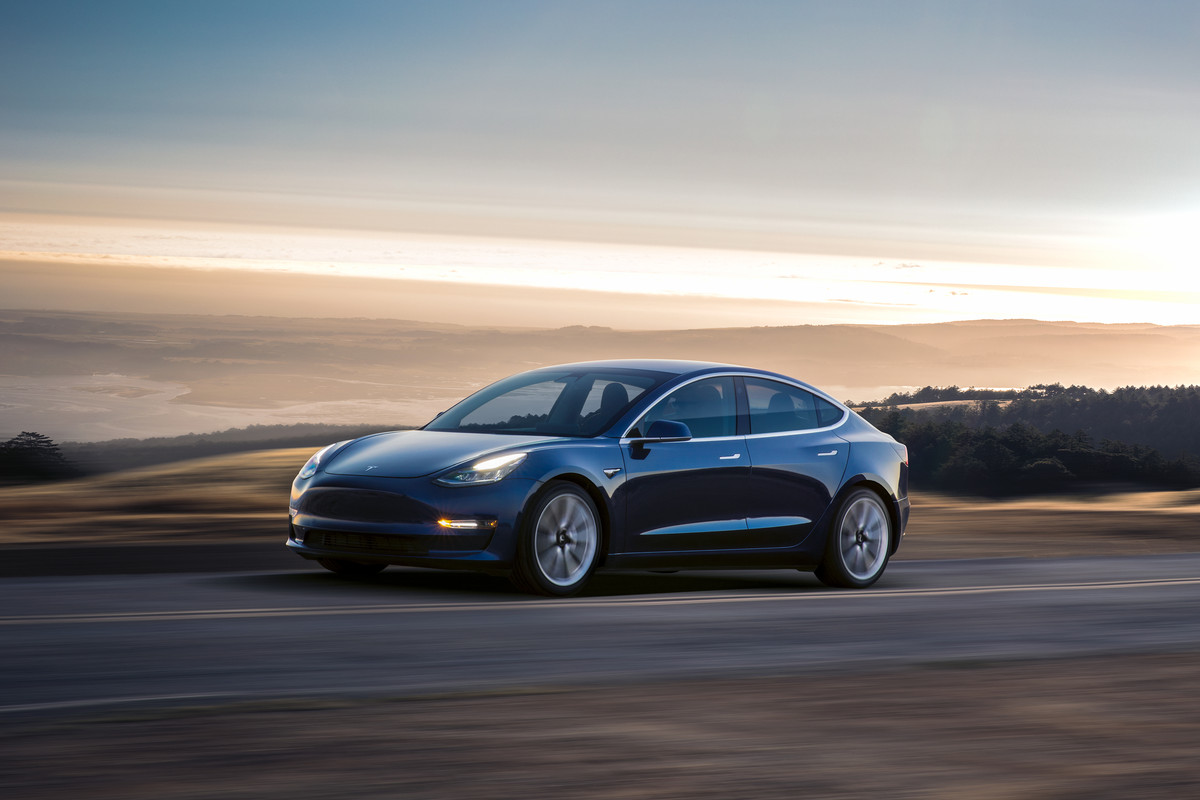

# **Pseudocode**

### Initialize two lists: `open_list` and `closed_list`.

### Add the start node to the `open_list`.

### While the `open_list` is not empty:

    * Remove the node with the lowest `f`-value from the `open_list`.

    * If the current node is the goal node, return the path from the start node to the current node.

    * Add the current node to the `closed_list`.

    * For each neighbor of the current node:

        * If the neighbor is not in the `closed_list`:

            * Calculate the tentative `g`-value of the neighbor.

            * If the neighbor is not in the `open_list` or if the tentative `g`-value is less than the neighbor's `g`-value:

                * Set the neighbor's parent node to the current node.

                * Set the neighbor's `g`-value to the tentative `g`-value.

                * Set the neighbor's `f`-value to the `g`-value plus the heuristic value.

                * Add the neighbor to the `open_list`.

### If the `open_list` is empty, then there is no path from the start node to the goal node.


# **The different components of the A* algorithm**

The A* algorithm is a powerful pathfinding algorithm that works by iteratively expanding the node with the lowest **f-value**. The **f-value** is a measure of how close the node is to the goal node, taking into account the cost of getting to the node and the estimated cost of getting from the node to the goal node.

The A* algorithm is made up of three main components:

* **G(start, node)**: This function represents the cumulative weight from the start node to the current node.
* **Transitions(node)**: This function returns all of the successors (or neighbors) of the current node.
* **Heuristic function**: This function provides an estimate of the distance to the goal node from the current node.

The A* algorithm works by iteratively expanding the node with the lowest f-value. For each node that is expanded, the algorithm calculates the tentative f-value of each of its successors. The tentative f-value is calculated by adding the cost of getting to the successor node to the heuristic estimate of the cost of getting from the successor node to the goal node.

The algorithm then adds the successors with the lowest tentative f-values to the open list. The open list is a priority queue that stores the nodes that need to be expanded next. The algorithm continues to expand nodes until it reaches the goal node or the open list is empty.


## Additional

In addition to the three main components, the A* algorithm also typically uses a number of additional tools , such as:

* **Closed list**: The closed list stores the nodes that have already been expanded. The algorithm uses the closed list to prevent itself from re-expanding the same node multiple times.
* **Open list**: The open list stores the nodes that need to be expanded next. The algorithm uses the open list to prioritize the nodes that should be expanded first.
* **Path reconstruction function**: This function takes the goal node as input and returns the shortest path from the start node to the goal node.


# Simple Implementaion using Python

## Let's start by examining what we have: a graph made up of nodes, costs, heuristics, start, and goal. The first question I like to ask myself is how I'm going to represent the graph in Python. There are three options, but I prefer the first one:

## Dictionary:
- Keys: nodes
- Values: successors
 
We'll dive into this later, but for now, just remember this. 
Other options:

- Adjacent lists:
 - Index: node
 - Values: list of neighbors at that index
- Matrix:
 - Each row: key
 - Content: successors

In [19]:
# Representation of a Node

class Node :
    
    def __init__(self,name,heuristic):
        self.name = name
        self.heuristic = heuristic

Let me made it clear for all of us , if we don't include the heuristic value in the node implementation the key in my opinion must be a tuple (n,h) which will only complicate things when coding.

remember that the simplifying things means you're smart enough to make it scary things looks dumb.

# Representation of the graph 

This graph is complex but it is the most suitable to test our algorithm.It is represented by the help of matplotlib ,I mentioned the weights and the heuristic for each node.

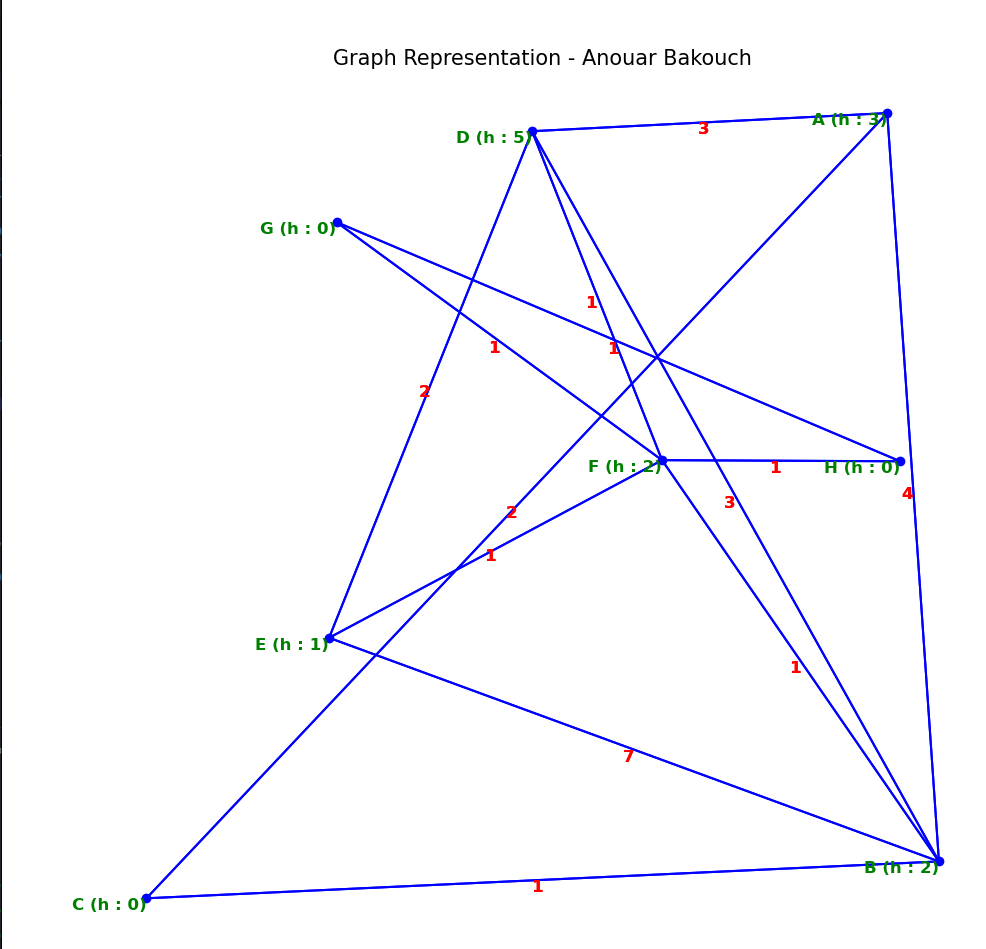

**The heuristic function value equales 0 for the goal node.**

In [21]:
# Representation of a Graph - dict version
"""
This is only to enhance your inderstanding : 

A = Node("A",0)
B = Node("B",3)
C = Node("C",5)
D = Node("D",0)

Graph = {
    A : [ (B,3) , (C,5)  ],
    B : [ (A,3) , (D,4) ],
    C : [ (A,5) , (D,1) ],
    D : [ (B,4) , (C,1) ]
}
"""

class Graph:

    def __init__(self, graph):
        self.graph = graph

    def successors(self, node):
        return self.graph[node]

    def heuristic(self, node):
        return node.heuristic

    def cost(self, node1, node2):
        successors = self.successors(node1)
        for (n, w) in successors:
            if n == node2:
                return w
        return 0

    def neighbors(self, node):
        voisins = []
        for (n, w) in self.successors(node):
            voisins.append(n)
        return voisins

    def goal(self, node, goal):
        return node == goal

    def addEdge(self, node1, node2, weight):
        self.graph[node1].append((node2, weight))

    def AStar(self, start, end):
        open = []
        closed = []
        open.append(start)
        start.parent = None
        path = []
        
        while True :
            # if open is empty, return failure
            if len(open) == 0:
                return None
            
            # choose the node with the lowest f on the open list
            current = open[0]
            open.remove(current)
            closed.append(current)

            # if goal(node) return path 
            if self.goal(current, end): 
                while current.parent != None:
                    path.append(current)
                    current = current.parent
                path.append(start)
                return path[::-1] 

            # for each successor of current
            for node in self.neighbors(current):
                # if node in closed list, continue
                if node in closed:
                    continue
                # if node not in open list, add it
                if node not in open:
                    node.parent = current
                    open.append(node)
                # else if the cost of current + cost of current to node < cost of node
                else:
                    if self.cost(current, node) < self.cost(node.parent, node):
                        node.parent = current
                        open.append(node)


# Let us test the algorithm now 

In [22]:
        
# TEST 
A = Node('A',3)
B = Node('B',2)
C = Node('C',7)
D = Node('D',5)
E = Node('E',1)
F = Node('F',2)
G = Node('G',0)
H = Node('H',0)

In [23]:
# H is the goal bc h = 0

graph = {
    C:[(A,2),(B,1)],
    A:[(B,4),(D,3),(C,2)],
    B:[(D,3),(E,7),(F,1),(A,4),(C,1)],
    D:[(E,2),(F,1),(B,3),(A,3)],
    E:[(F,1),(D,2),(B,7)],
    F:[(G,1),(H,1),(E,1),(D,1),(B,1)],
    G:[(H,1),(F,1)],
    H:[(G,1),(F,1)]
}

In [25]:
g = Graph(graph)
goal = g.AStar(C,H)
print(f"path : {[node.name for node in goal]}")

path : ['C', 'B', 'F', 'H']


# Conclusion

Overall, A* is a very powerful and versatile pathfinding algorithm. It is well-suited for a variety of applications, and it is often the first choice for developers who need to find the shortest path between two points in a graph.

NB : You can implement it using heapq , make sure to search about it.

different ways to use the A algorithm in Kaggle competitions